In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Data Input

In [ ]:
img_height,img_width=256,256
batch_size=8
directory = '/home/axernox/Project_2/Lungs_Cropped_Raw/train'
train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3805 files belonging to 2 classes.


In [17]:
directoryval = '/home/axernox/Project_2/Lungs_Cropped_Raw/val'
val = keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 815 files belonging to 2 classes.


In [18]:
directorytest = '/home/axernox/Project_2/Lungs_Cropped_Raw/test'
test = keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 804 files belonging to 2 classes.


In [19]:
class_names = train.class_names
print(class_names)

['Resistive', 'Sensitive']


In [24]:
pretrained_model= tf.keras.applications.EfficientNetB0(
                    include_top=False,
                    input_shape=(256,256,3),
                    pooling='avg',
                    classes=2,
                    weights="imagenet")
for layer in pretrained_model.layers:
        layer.trainable=False
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

x = pretrained_model.output
x = Dense(512, activation='relu')(x)
output = Dense(2, activation='softmax')(x)      

efficientnet_model = Model(inputs=pretrained_model.input, outputs=output)


In [8]:
efficientnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 256, 256,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 256, 256,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 256, 256,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 4,706,469 (17.95 MB)

 Trainable params: 1,550,130 (5.91 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [25]:
efficientnet_model.compile(optimizer=Adam(learning_rate=5*1e-4),loss='binary_crossentropy',metrics=['accuracy'])

### Raw Images

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


I0000 00:00:1740928079.306571    1063 service.cc:148] XLA service 0x7f30e0002080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740928079.308232    1063 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-02 20:37:59.679298: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740928080.697195    1063 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-02 20:38:02.440051: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10728', 4 bytes spill stores, 4 bytes spill loads

2025-03-02 20:38:02.714309: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11

474/476 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6512 - loss: 0.6200

2025-03-02 20:38:32.207380: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10728', 4 bytes spill stores, 4 bytes spill loads

2025-03-02 20:38:32.579921: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11063', 8 bytes spill stores, 8 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6513 - loss: 0.6199

2025-03-02 20:38:50.365005: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2069', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.6514 - loss: 0.6198 - val_accuracy: 0.7337 - val_loss: 0.5483
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7501 - loss: 0.5092 - val_accuracy: 0.7656 - val_loss: 0.5034
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7991 - loss: 0.4356 - val_accuracy: 0.7644 - val_loss: 0.4967
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8193 - loss: 0.3951 - val_accuracy: 0.7632 - val_loss: 0.5032
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8520 - loss: 0.3521 - val_accuracy: 0.7804 - val_loss: 0.5024
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8703 - loss: 0.3064 - val_accuracy: 0.7779 - val_loss: 0.4754
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8940 - loss: 0.2750 - val_accuracy: 0.7840 - val_loss: 0.4992
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9052 - loss: 0.2332 - val_accurac

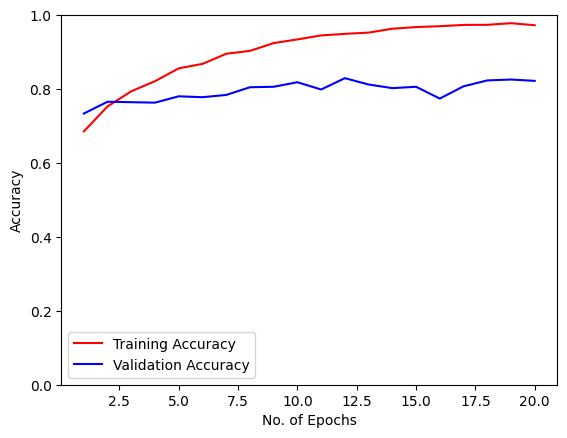

In [10]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

2025-03-02 20:44:53.346157: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2040', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step


2025-03-02 20:45:03.199399: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.86      0.80      0.83       399
   Sensitive       0.81      0.87      0.84       405

    accuracy                           0.83       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.83      0.83      0.83       804



<Axes: >

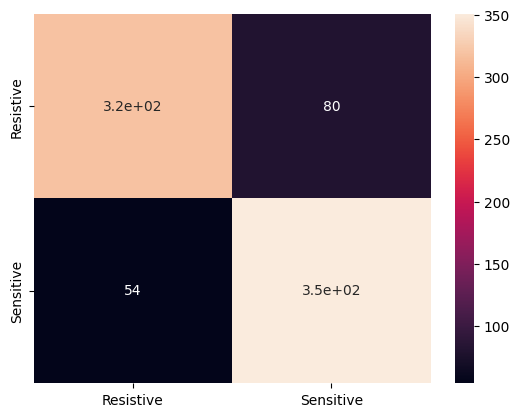

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With CLAHE

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


I0000 00:00:1741623856.089854   15410 service.cc:148] XLA service 0x7fcc0c013d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741623856.095645   15410 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-10 21:54:16.618312: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741623857.897141   15410 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-10 21:54:19.952287: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11063', 8 bytes spill stores, 8 bytes spill loads

2025-03-10 21:54:21.377544: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10

  3/476 ━━━━━━━━━━━━━━━━━━━━ 6:51 869ms/step - accuracy: 0.5764 - loss: 0.6788 

I0000 00:00:1741623873.852045   15410 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


473/476 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6453 - loss: 0.6290

2025-03-10 21:55:01.335734: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10728', 4 bytes spill stores, 4 bytes spill loads

2025-03-10 21:55:02.169567: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11063', 8 bytes spill stores, 8 bytes spill loads

2025-03-10 21:55:09.493967: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng48{k2=2,k6=2,k13=1,k14=0,k22=2} for conv (f32[5,112,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,672,16,16]{3,2,1,0}, f32[112,672,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":

476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6455 - loss: 0.6288

2025-03-10 21:55:26.725268: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2069', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 84s 126ms/step - accuracy: 0.6456 - loss: 0.6288 - val_accuracy: 0.7252 - val_loss: 0.5523
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.7465 - loss: 0.5027 - val_accuracy: 0.7350 - val_loss: 0.5384
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.7913 - loss: 0.4456 - val_accuracy: 0.7620 - val_loss: 0.5206
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.8271 - loss: 0.3815 - val_accuracy: 0.7620 - val_loss: 0.5503
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8542 - loss: 0.3322 - val_accuracy: 0.7669 - val_loss: 0.5140
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.8800 - loss: 0.2977 - val_accuracy: 0.7804 - val_loss: 0.5418
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8940 - loss: 0.2572 - val_accuracy: 0.7840 - val_loss: 0.5131
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9247 - loss: 0.2091 - val_accura

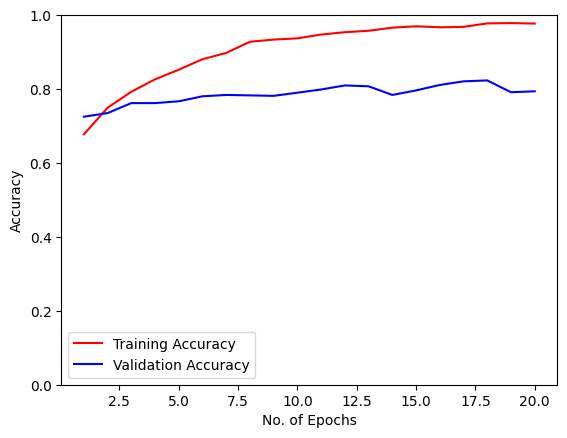

In [10]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

2025-03-10 22:05:02.117052: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2040', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step


2025-03-10 22:05:12.469521: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.88      0.76      0.82       399
   Sensitive       0.79      0.90      0.84       405

    accuracy                           0.83       804
   macro avg       0.84      0.83      0.83       804
weighted avg       0.84      0.83      0.83       804



<Axes: >

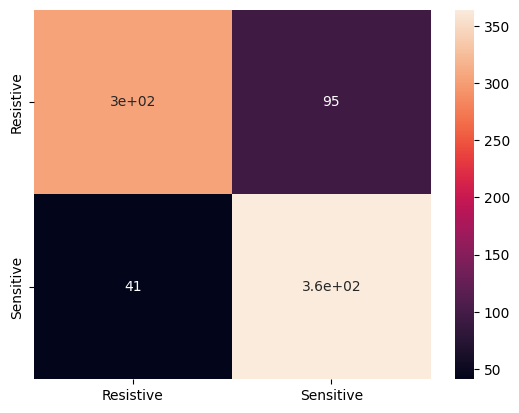

In [13]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With Gabor

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 60s 87ms/step - accuracy: 0.6487 - loss: 0.6273 - val_accuracy: 0.7178 - val_loss: 0.5793
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.7505 - loss: 0.5068 - val_accuracy: 0.7190 - val_loss: 0.5947
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.7821 - loss: 0.4525 - val_accuracy: 0.7325 - val_loss: 0.5618
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.8155 - loss: 0.3978 - val_accuracy: 0.7620 - val_loss: 0.5277
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.8475 - loss: 0.3529 - val_accuracy: 0.7681 - val_loss: 0.5660
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8708 - loss: 0.3124 - val_accuracy: 0.7693 - val_loss: 0.5939
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8850 - loss: 0.2774 - val_accuracy: 0.7779 - val_loss: 0.5723
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.9068 - loss: 0.2413 - 

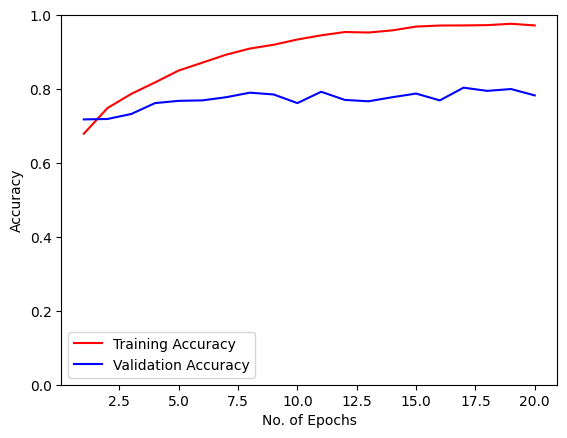

In [20]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step


2025-03-10 22:17:23.856016: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.88      0.76      0.81       399
   Sensitive       0.79      0.90      0.84       405

    accuracy                           0.83       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.83      0.83      0.83       804



<Axes: >

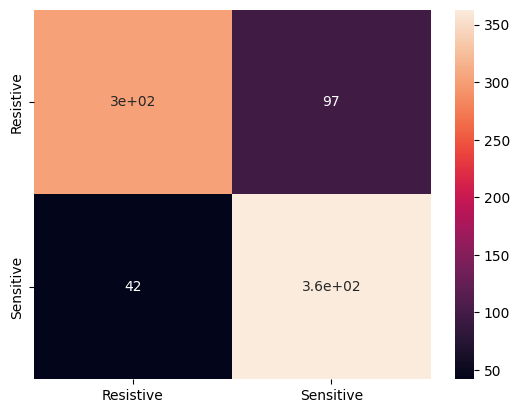

In [23]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With CANNY

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.6572 - loss: 0.6139 - val_accuracy: 0.7104 - val_loss: 0.5627
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7426 - loss: 0.5166 - val_accuracy: 0.7264 - val_loss: 0.5245
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7838 - loss: 0.4579 - val_accuracy: 0.7448 - val_loss: 0.5185
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8021 - loss: 0.4201 - val_accuracy: 0.7288 - val_loss: 0.5265
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8306 - loss: 0.3808 - val_accuracy: 0.7497 - val_loss: 0.5218
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8501 - loss: 0.3483 - val_accuracy: 0.7436 - val_loss: 0.5501
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8628 - loss: 0.3074 - val_accuracy: 0.7497 - val_loss: 0.5490
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8797 - loss: 0.2772 - 

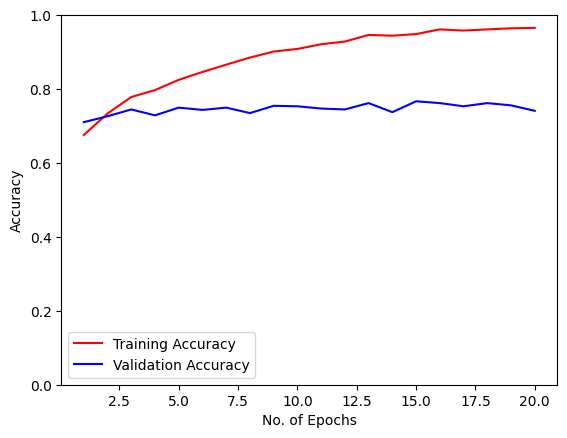

In [30]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.77      0.75      0.76       399
   Sensitive       0.76      0.78      0.77       405

    accuracy                           0.76       804
   macro avg       0.76      0.76      0.76       804
weighted avg       0.76      0.76      0.76       804



<Axes: >

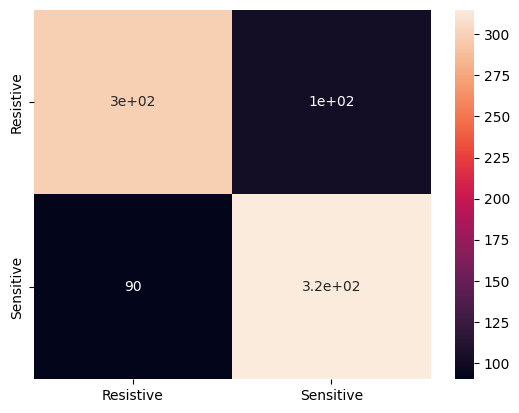

: 

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With Lung Segmentations on CLAHE

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=30,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.5323 - loss: 0.7212 - val_accuracy: 0.5620 - val_loss: 0.7398
Epoch 2/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5978 - loss: 0.6603 - val_accuracy: 0.6049 - val_loss: 0.7161
Epoch 3/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6397 - loss: 0.6204 - val_accuracy: 0.5975 - val_loss: 0.7289
Epoch 4/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6834 - loss: 0.5819 - val_accuracy: 0.6331 - val_loss: 0.7323
Epoch 5/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7135 - loss: 0.5358 - val_accuracy: 0.6393 - val_loss: 0.8112
Epoch 6/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7472 - loss: 0.4974 - val_accuracy: 0.6380 - val_loss: 0.8226
Epoch 7/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7831 - loss: 0.4395 - val_accuracy: 0.6344 - val_loss: 0.8689
Epoch 8/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8296 - loss: 0.3753 - val_a

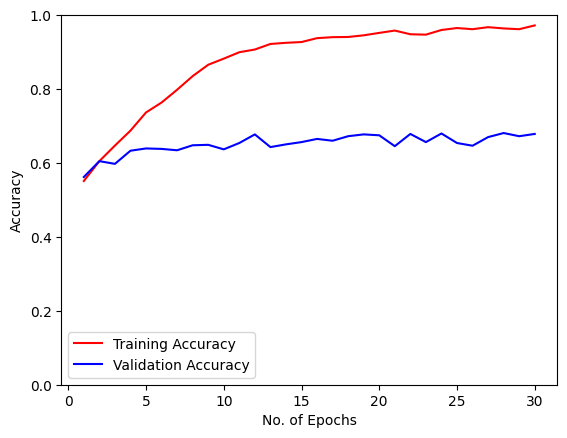

In [17]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step


2025-03-19 19:34:53.005347: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.68      0.63      0.66       399
   Sensitive       0.66      0.71      0.68       405

    accuracy                           0.67       804
   macro avg       0.67      0.67      0.67       804
weighted avg       0.67      0.67      0.67       804



<Axes: >

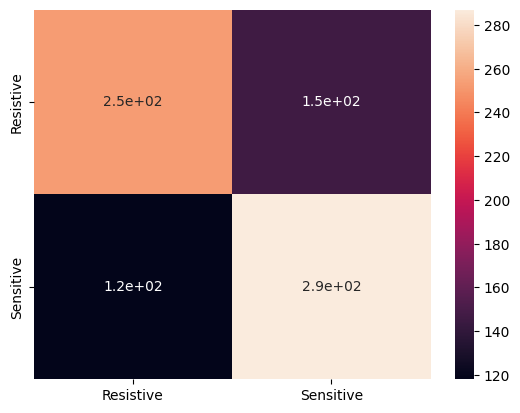

In [20]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With Lungs Cropped on CLAHE

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=60,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.6249 - loss: 0.6538 - val_accuracy: 0.6748 - val_loss: 0.6019
Epoch 2/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7219 - loss: 0.5531 - val_accuracy: 0.7092 - val_loss: 0.6067
Epoch 3/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7670 - loss: 0.4812 - val_accuracy: 0.7141 - val_loss: 0.5940
Epoch 4/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7940 - loss: 0.4255 - val_accuracy: 0.7337 - val_loss: 0.5867
Epoch 5/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8376 - loss: 0.3669 - val_accuracy: 0.7546 - val_loss: 0.5893
Epoch 6/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8622 - loss: 0.3145 - val_accuracy: 0.7693 - val_loss: 0.6251
Epoch 7/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8841 - loss: 0.2717 - val_accuracy: 0.7681 - val_loss: 0.6585
Epoch 8/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9078 - loss: 0.2153 - val_a

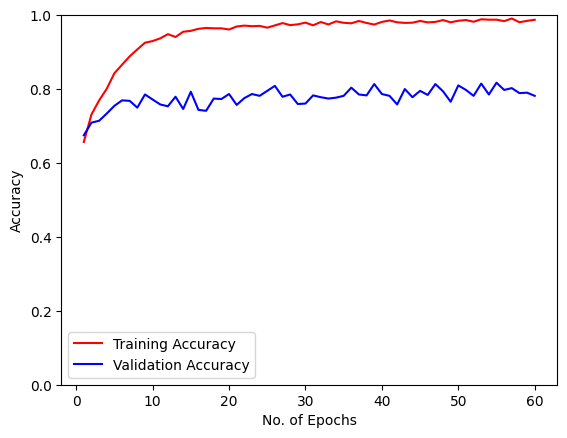

In [17]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step


2025-03-20 14:43:08.874127: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.86      0.79      0.83       399
   Sensitive       0.81      0.88      0.84       405

    accuracy                           0.84       804
   macro avg       0.84      0.84      0.84       804
weighted avg       0.84      0.84      0.84       804



<Axes: >

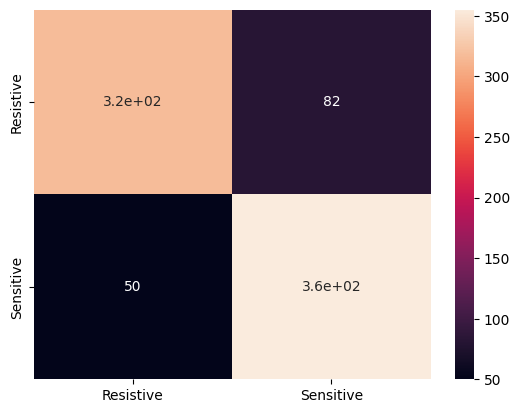

In [20]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With Lungs Cropped on CLAHE - 2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=60,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.6249 - loss: 0.6538 - val_accuracy: 0.6748 - val_loss: 0.6019
Epoch 2/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7219 - loss: 0.5531 - val_accuracy: 0.7092 - val_loss: 0.6067
Epoch 3/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7670 - loss: 0.4812 - val_accuracy: 0.7141 - val_loss: 0.5940
Epoch 4/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7940 - loss: 0.4255 - val_accuracy: 0.7337 - val_loss: 0.5867
Epoch 5/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8376 - loss: 0.3669 - val_accuracy: 0.7546 - val_loss: 0.5893
Epoch 6/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8622 - loss: 0.3145 - val_accuracy: 0.7693 - val_loss: 0.6251
Epoch 7/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8841 - loss: 0.2717 - val_accuracy: 0.7681 - val_loss: 0.6585
Epoch 8/60
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9078 - loss: 0.2153 - val_a

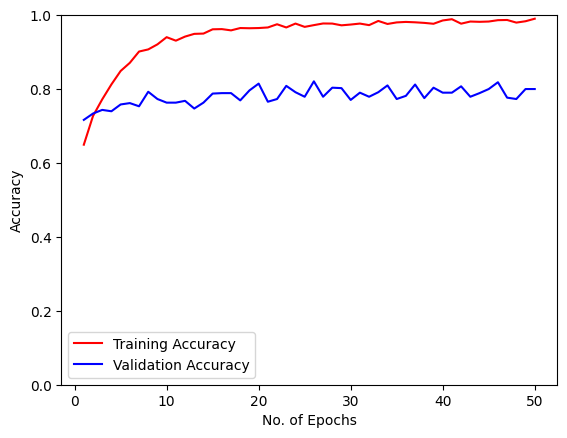

In [10]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 97/101 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

2025-04-02 09:54:06.460322: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2040', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step


2025-04-02 09:54:13.499333: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.85      0.84      0.84       399
   Sensitive       0.84      0.85      0.85       405

    accuracy                           0.84       804
   macro avg       0.84      0.84      0.84       804
weighted avg       0.84      0.84      0.84       804



<Axes: >

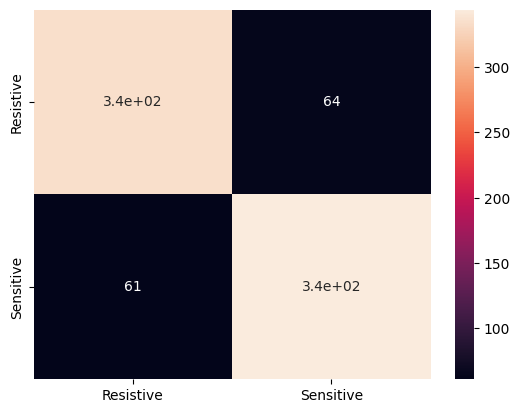

In [13]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

In [14]:
efficientnet_model.save('efficientnetb0.keras')

### With Lungs Cropped Raw

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = efficientnet_model.fit(
  train,
  validation_data=val,
  epochs=50,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.6468 - loss: 0.6382 - val_accuracy: 0.6945 - val_loss: 0.5869
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7234 - loss: 0.5515 - val_accuracy: 0.7190 - val_loss: 0.5575
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7581 - loss: 0.5028 - val_accuracy: 0.7202 - val_loss: 0.5517
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7884 - loss: 0.4450 - val_accuracy: 0.7215 - val_loss: 0.5893
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8189 - loss: 0.3991 - val_accuracy: 0.7374 - val_loss: 0.5595
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8377 - loss: 0.3502 - val_accuracy: 0.7448 - val_loss: 0.6095
Epoch 7/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8856 - loss: 0.2821 - val_accuracy: 0.7043 - val_loss: 0.8235
Epoch 8/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8926 - loss: 0.2685 - val_a

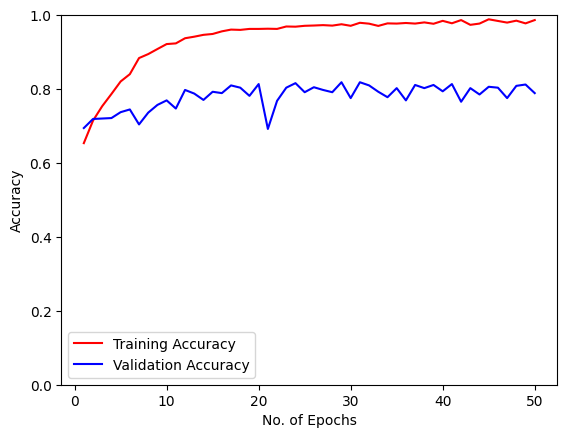

In [27]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
pred = efficientnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step


2025-04-03 13:14:09.030889: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.86      0.77      0.82       399
   Sensitive       0.80      0.88      0.84       405

    accuracy                           0.83       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.83      0.83      0.83       804



<Axes: >

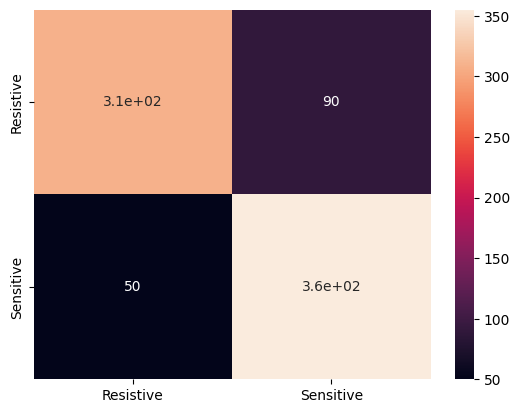

In [30]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)